# Telecomunicaciones

In [15]:
# Importamos las librerias necesarias para el analisis exploratorio de datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Penetración de Internet fijo (accesos por cada 100 hogares).
### Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia.

In [16]:
penetracion_inter = pd.read_csv('DATA/1_Internet_Penetracion.csv') # Cargamos el dataset.
penetracion_inter # Mostramos el dataset.

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


In [17]:
penetracion_inter = penetracion_inter.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1) # Eliminamos las columnas no deseadas.
penetracion_inter # Mostramos el dataset.

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


In [18]:
penetracion_inter.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


La columna 'Accesos por cada 100 hogares' está actualmente como tipo 'object'. Para realizar operaciones numéricas, como cálculos estadísticos o gráficos, es preferible convertir esta columna a tipo numérico.

In [19]:
# Reemplazar comas por puntos en la columna 'Accesos por cada 100 hogares'
penetracion_inter['Accesos por cada 100 hogares'] = penetracion_inter['Accesos por cada 100 hogares'].str.replace(',', '.')

# Conversión de 'Accesos por cada 100 hogares' a tipo numérico
penetracion_inter['Accesos por cada 100 hogares'] = pd.to_numeric(penetracion_inter['Accesos por cada 100 hogares'], errors='coerce')

penetracion_inter.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [20]:
penetracion_inter # Mostramos el dataset.

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
859,2014,1,Santa Cruz,28.94
860,2014,1,Santa Fe,47.85
861,2014,1,Santiago Del Estero,16.31
862,2014,1,Tierra Del Fuego,63.97


In [21]:
penetracion_inter.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


De esta informacion, vemos que los datos muestran una variabilidad considerable en los accesos por cada 100 hogares a lo largo del tiempo, con una distribución amplia de valores y una media de 49.6 accesos por cada 100 hogares, lo que nos indica que la mayoría de las provincias tienen menos de 50 accesos por cada 100 hogares.

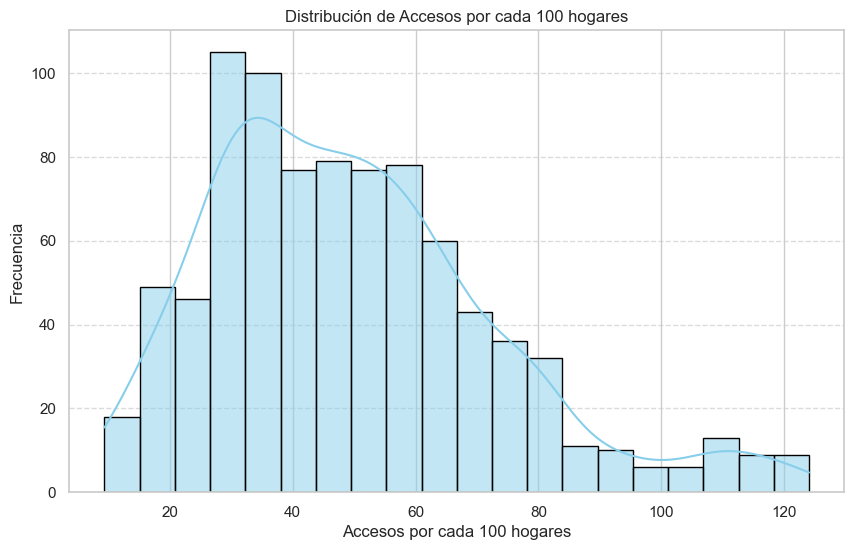

In [37]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Graficamos la distribución de la variable 'Accesos por cada 100 hogares'
plt.figure(figsize=(10, 6))
sns.histplot(penetracion_inter['Accesos por cada 100 hogares'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

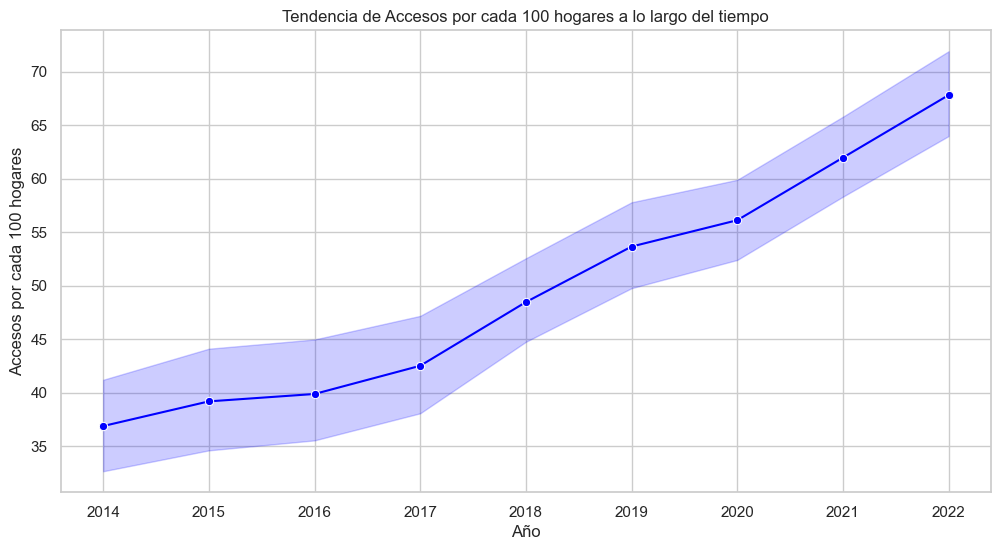

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=penetracion_inter, marker='o', color='blue')
plt.title('Tendencia de Accesos por cada 100 hogares a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()

C:\Users\jhgal\AppData\Local\Temp\ipykernel_3392\3709259755.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=accesos_por_provincia.index, x=accesos_por_provincia, palette='viridis', saturation=0.8)


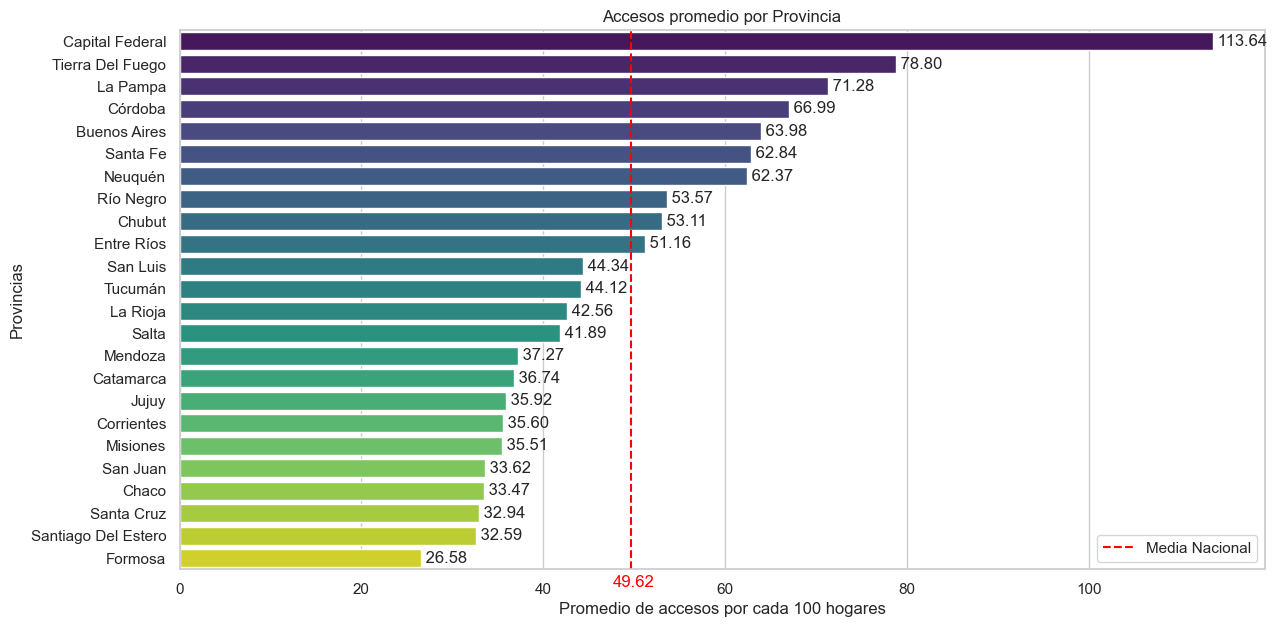

In [36]:


# Agrupamos el dataframe por provincias y calculamos el promedio
accesos_por_provincia = penetracion_inter.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)

# Calculamos el promedio general
promedio_general = penetracion_inter['Accesos por cada 100 hogares'].mean()

# Establecemos el estilo de seaborn
sns.set(style="whitegrid")

# Creamos la figura y los ejes del gráfico
plt.figure(figsize=(14, 7))

# Gráfico de barras para visualizar los accesos promedio por provincia
sns.barplot(y=accesos_por_provincia.index, x=accesos_por_provincia, palette='viridis', saturation=0.8)

# Agregamos etiquetas y título
plt.title('Accesos promedio por Provincia')
plt.xlabel('Promedio de accesos por cada 100 hogares')
plt.ylabel('Provincias')

# Agregamos los valores promedio a cada barra
for i, value in enumerate(accesos_por_provincia):
    plt.text(value, i, f' {value:.2f}', ha='left', va='center')

# Agregamos una línea vertical con el promedio general
plt.axvline(x=promedio_general, color="red", linestyle="--", label="Media Nacional")
plt.text(promedio_general - 2, len(accesos_por_provincia) + 0.3, f'{promedio_general:.2f}', color='red')

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()
3

# Total nacional de accesos a Internet fijo por banda ancha y banda angosta.
### Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral).

In [48]:
internet_baf = pd.read_csv('DATA/2_Internet_BAF.csv') # Cargamos el dataset.
internet_baf.head() # Mostramos el dataset.

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


In [49]:
internet_baf.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [50]:
internet_baf.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,8.361111,23.083333,8.361111
std,2.618615,1.133893,1.495761,10.171037,1.495761
min,2014.000000,1.000000,6.000000,10.000000,6.000000
25%,2016.000000,1.750000,7.000000,12.000000,7.000000
50%,2018.000000,2.500000,8.000000,27.000000,8.000000
75%,2020.000000,3.250000,9.250000,32.250000,9.250000
max,2022.000000,4.000000,11.000000,39.000000,11.000000


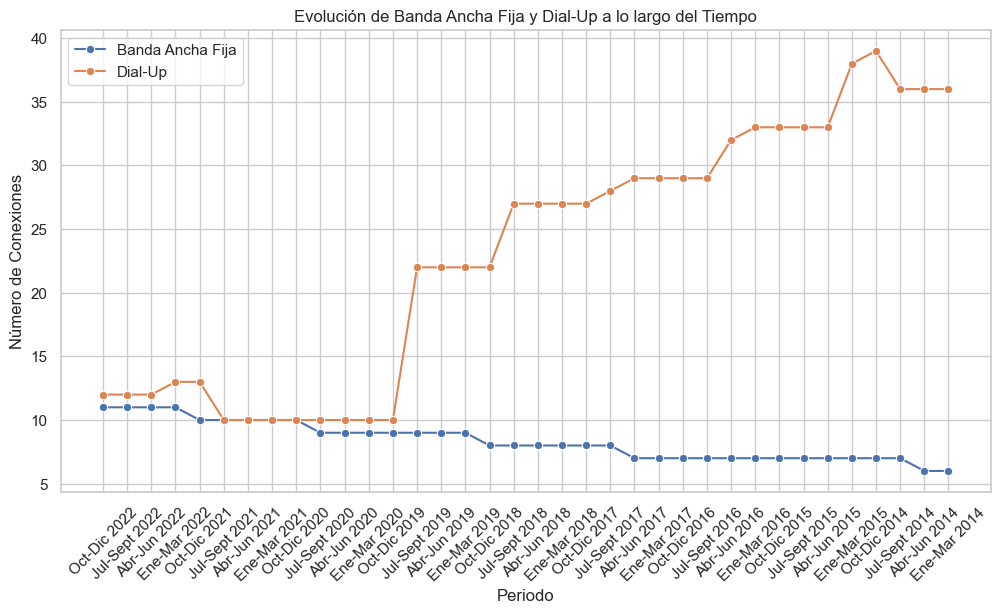

In [51]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de líneas para Banda Ancha Fija y Dial-Up a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Periodo', y='Banda ancha fija', data=internet_baf, label='Banda Ancha Fija', marker='o')
sns.lineplot(x='Periodo', y='Dial up', data=internet_baf, label='Dial-Up', marker='o')
plt.title('Evolución de Banda Ancha Fija y Dial-Up a lo largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Número de Conexiones')
plt.xticks(rotation=45)
plt.legend()
plt.show()


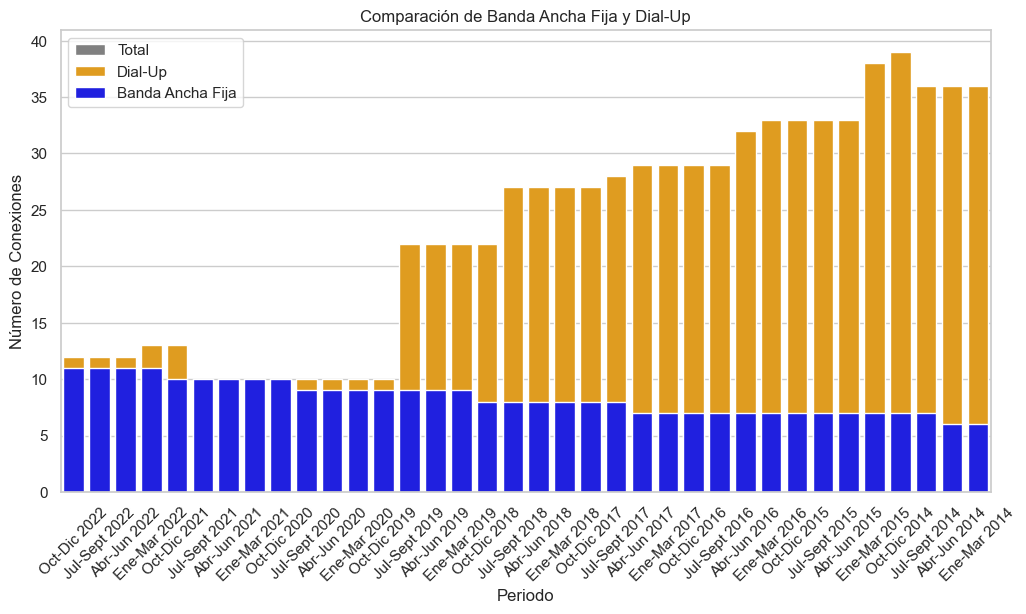

In [53]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras apiladas para comparar Banda Ancha Fija y Dial-Up
plt.figure(figsize=(12, 6))
sns.barplot(x='Periodo', y='Total', data=internet_baf, label='Total', color='gray')
sns.barplot(x='Periodo', y='Dial up', data=internet_baf, label='Dial-Up', color='orange')
sns.barplot(x='Periodo', y='Banda ancha fija', data=internet_baf, label='Banda Ancha Fija', color='blue')
plt.title('Comparación de Banda Ancha Fija y Dial-Up')
plt.xlabel('Periodo')
plt.ylabel('Número de Conexiones')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Velocidad Media de bajada de Internet fijo
#### Serie histórica de la velocidad media de descarga de Internet nacional (trimestral)

In [57]:
velocidad_internet = pd.read_csv('DATA/3_historico_velocidad_internet.csv') # Cargamos el dataset.
velocidad_internet.head() # Mostramos el dataset.

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,10.656,Oct-Dic 2022
1,2022,3,6.246,Jul-Sept 2022
2,2022,2,5.844,Abr-Jun 2022
3,2022,1,5.511,Ene-Mar 2022
4,2021,4,5.234,Oct-Dic 2021


In [58]:
velocidad_internet.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [62]:
velocidad_internet.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Mbps (Media de bajada)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,221.615333
std,2.618615,1.133893,275.439068
min,2014.000000,1.000000,1.201000
25%,2016.000000,1.750000,3.520500
50%,2018.000000,2.500000,5.677500
75%,2020.000000,3.250000,461.000000
max,2022.000000,4.000000,834.000000


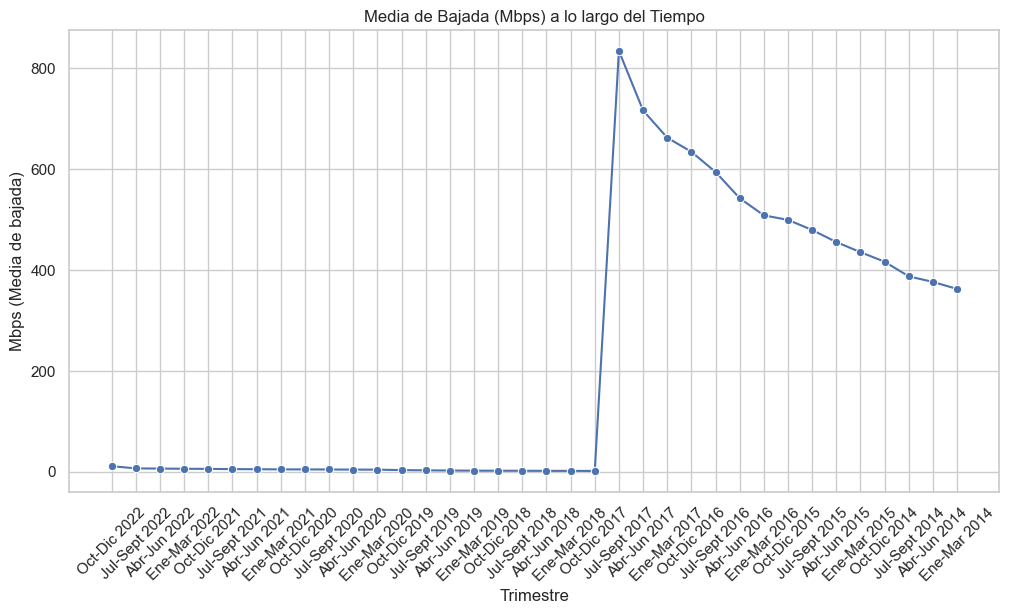

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de líneas para la Media de Bajada (Mbps) a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre.1', y='Mbps (Media de bajada)', data=velocidad_internet, marker='o')
plt.title('Media de Bajada (Mbps) a lo largo del Tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)
plt.show()



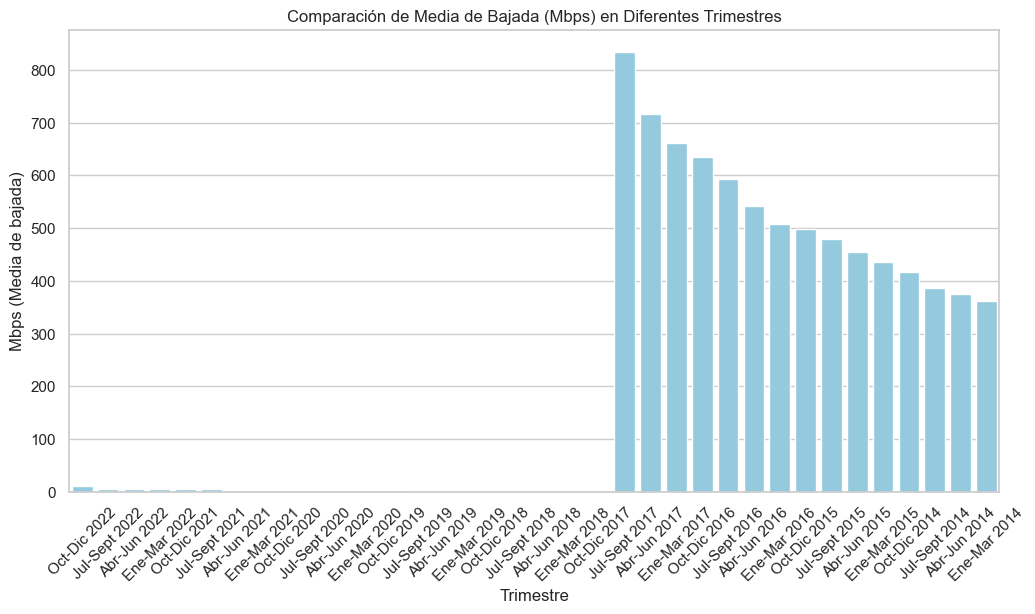

In [61]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para comparar la Media de Bajada (Mbps) en diferentes trimestres
plt.figure(figsize=(12, 6))
sns.barplot(x='Trimestre.1', y='Mbps (Media de bajada)', data=velocidad_internet, color='skyblue')
plt.title('Comparación de Media de Bajada (Mbps) en Diferentes Trimestres')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)
plt.show()


## Accesos a banda ancha y banda angosta por provincia.
#### Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral).

In [65]:
internet_baf_province = pd.read_csv('DATA/4_Internet_BAF_Provincia.csv') # Cargamos el dataset.
internet_baf_province # Mostramos el dataset.

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28


In [66]:
internet_baf_province.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [67]:
internet_baf_province.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


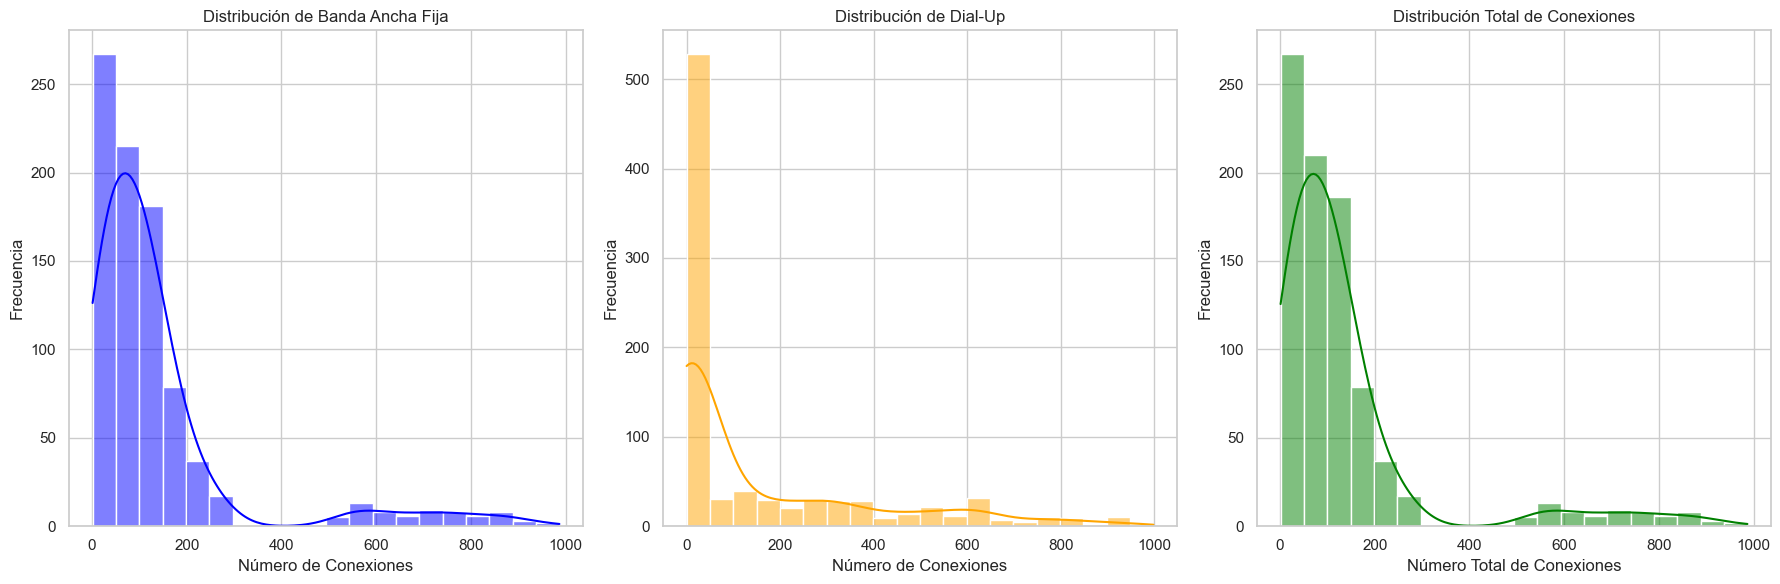

In [75]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Histograma para la distribución de Banda Ancha Fija
sns.histplot(internet_baf_province['Banda ancha fija'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribución de Banda Ancha Fija')
axes[0].set_xlabel('Número de Conexiones')
axes[0].set_ylabel('Frecuencia')

# Histograma para la distribución de Dial-Up
sns.histplot(internet_baf_province['Dial up'].dropna(), bins=20, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribución de Dial-Up')
axes[1].set_xlabel('Número de Conexiones')
axes[1].set_ylabel('Frecuencia')

# Histograma para la distribución total
sns.histplot(internet_baf_province['Total'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribución Total de Conexiones')
axes[2].set_xlabel('Número Total de Conexiones')
axes[2].set_ylabel('Frecuencia')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


### Acceso a Internet fijo por tecnología y provincia.
##### Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral).

In [90]:
internet_tecnologia = pd.read_csv('DATA/5_Internet_Accesos-por-tecnologia.csv') # Cargamos el dataset.
internet_tecnologia # Mostramos el dataset.

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0
863,2014,1,Tucumán,130.0,83.0,121.0,13.0,98.0,130.0


In [91]:
internet_tecnologia.info() # Mostramos la informacion del dataset.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


In [92]:
# Paso 1: Eliminar la última fila
internet_tecnologia = internet_tecnologia.iloc[:-1]  # Elimina la última fila

# Paso 2: Tratar valores nulos (si es necesario)
# Por ejemplo, llenar los valores nulos con ceros
internet_tecnologia = internet_tecnologia.fillna(0)

# Paso 3: Convertir ciertas columnas a tipo de dato entero
columnas_a_convertir = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
internet_tecnologia[columnas_a_convertir] = internet_tecnologia[columnas_a_convertir].astype(int)

# Verificar el resultado
print(internet_tecnologia.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    object
 1   Trimestre     864 non-null    object
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int32 
 4   Cablemodem    864 non-null    int32 
 5   Fibra óptica  864 non-null    int32 
 6   Wireless      864 non-null    int32 
 7   Otros         864 non-null    int32 
 8   Total         864 non-null    int32 
dtypes: int32(6), object(3)
memory usage: 40.6+ KB
None


In [93]:
internet_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326,3,1,130,72,5
1,2022,4,Capital Federal,139,1,139,5,32,2
2,2022,4,Catamarca,9,11,47,1,2,71
3,2022,4,Chaco,25,61,47,8,3,144
4,2022,4,Chubut,45,74,10,31,9,169
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,19,100,381,4,3,27
860,2014,1,Santa Fe,323,174,3,6,644,507
861,2014,1,Santiago Del Estero,33,4,19,915,34,37
862,2014,1,Tierra Del Fuego,22,3,648,1,3,28


In [94]:
internet_tecnologia['Año'] = internet_tecnologia['Año'].str.replace(' *','').astype(int)
internet_tecnologia['Trimestre'] = internet_tecnologia['Trimestre'].str.replace(' *','').astype(int)


In [95]:
internet_tecnologia.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,2.583484,1.118682,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2016.000000,1.750000,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,2018.000000,2.500000,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,2020.000000,3.250000,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,2022.000000,4.000000,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


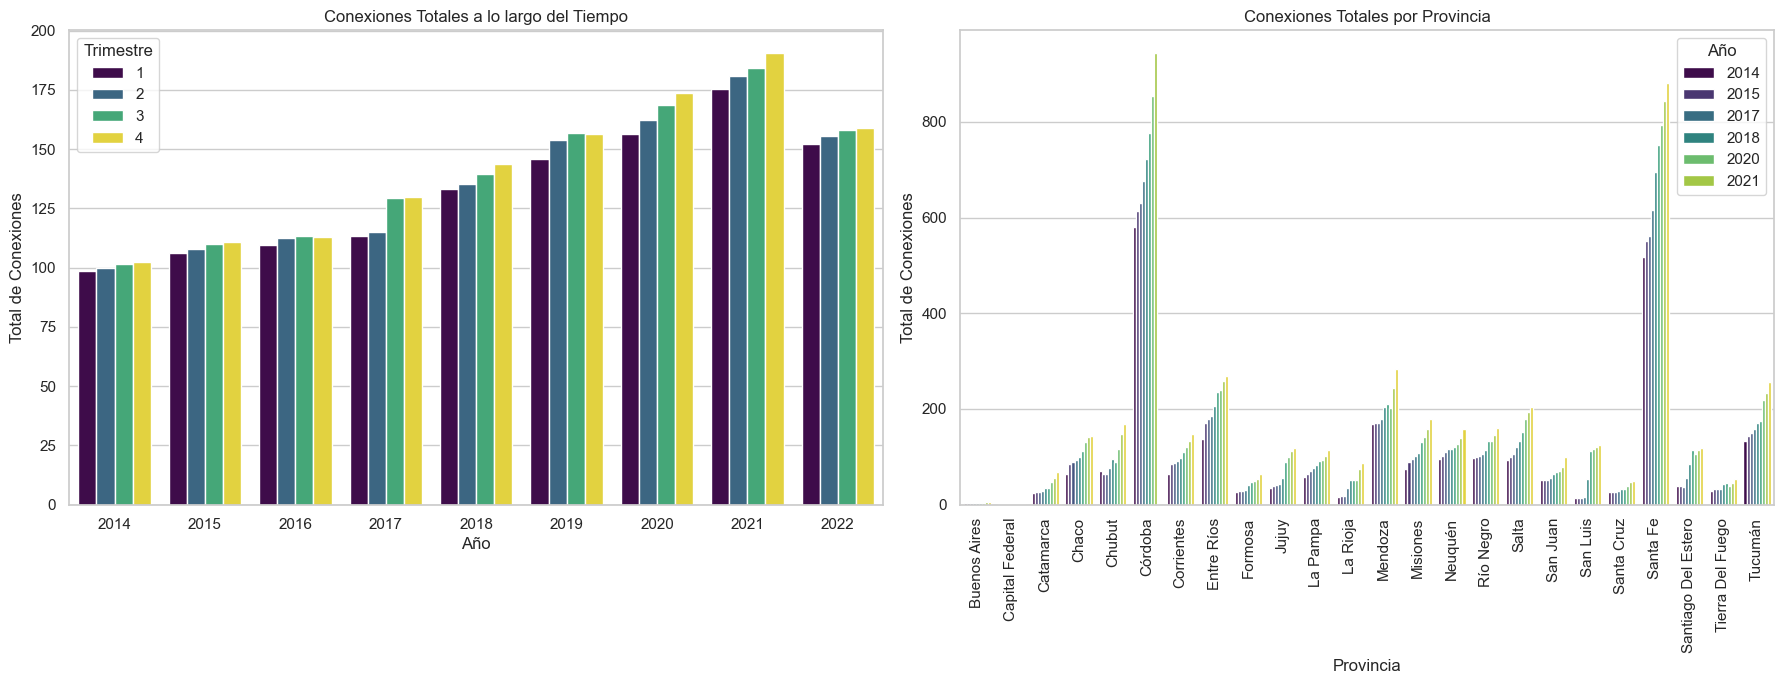

In [112]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Gráfico de barras apiladas para cada tipo de conexión a lo largo del tiempo
sns.barplot(x='Año', y='Total', hue='Trimestre', data=internet_tecnologia, errorbar=None, palette='viridis', ax=axes[0])
axes[0].set_title('Conexiones Totales a lo largo del Tiempo')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Total de Conexiones')
axes[0].legend(title='Trimestre')

# Gráfico de barras apiladas para cada tipo de conexión por provincia
ax = sns.barplot(x='Provincia', y='Total', hue='Año', data=internet_tecnologia, errorbar=None, palette='viridis', ax=axes[1])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_title('Conexiones Totales por Provincia')
ax.set_xlabel('Provincia')
ax.set_ylabel('Total de Conexiones')
ax.legend(title='Año')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la imagen
plt.show()



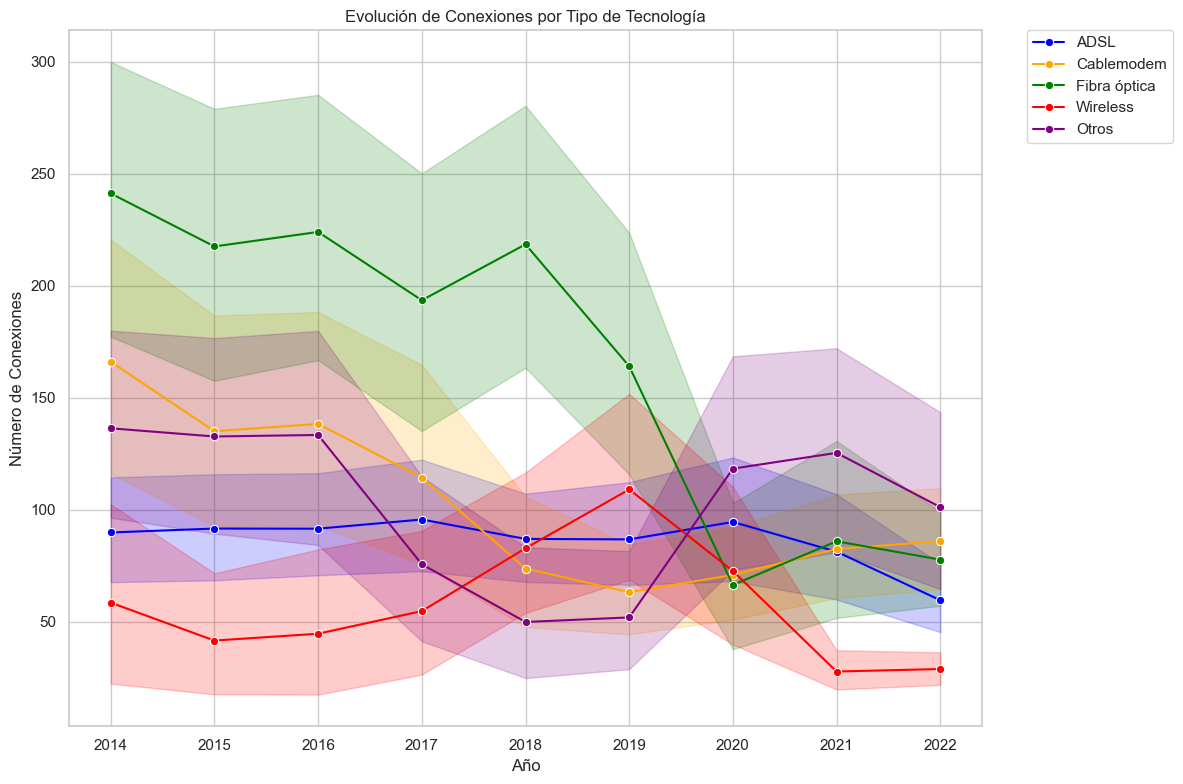

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de líneas para la evolución de tecnologías a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(x='Año', y='ADSL', data=internet_tecnologia, marker='o', label='ADSL', color='blue')
sns.lineplot(x='Año', y='Cablemodem', data=internet_tecnologia, marker='o', label='Cablemodem', color='orange')
sns.lineplot(x='Año', y='Fibra óptica', data=internet_tecnologia, marker='o', label='Fibra óptica', color='green')
sns.lineplot(x='Año', y='Wireless', data=internet_tecnologia, marker='o', label='Wireless', color='red')
sns.lineplot(x='Año', y='Otros', data=internet_tecnologia, marker='o', label='Otros', color='purple')

plt.title('Evolución de Conexiones por Tipo de Tecnología')
plt.xlabel('Año')
plt.ylabel('Número de Conexiones')
plt.legend(title='Tipo de Tecnología', loc='upper left')

# Añadir una leyenda separada fuera del gráfico para mejorar la legibilidad
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()
